# DATA3888 Project Report: Holiday Planner

COVID C4

In [11]:
import itertools
import more_itertools
import random
import matplotlib.pyplot as plt

from statistics import mean
from matplotlib.ticker import MaxNLocator

from analytics.analytics_clustering import *
from analytics.analytics_helper_clustering import *
from analytics.analytics import *
from analytics.analytics_helper import *
from analytics.common import *

from IPython.display import Image

In [12]:
# hides warnings - these warnings do not affect code functionality

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [13]:
random.seed(3888)

In [14]:
# reading in all data
covid = read_live_covid_data()
countries_data = integrate_all_data(covid)

## 1. Executive summary

Due to the travel industry being heavily affected by COVID-19, our ‘Holiday Planner’ application was proposed to incorporate the pandemic with the tourism business to show Australians that traveling can still be the rewarding experience that it once used to be. This report encapsulates the major problems, our main findings/solutions, and the practical relevance of our analysis.

### 1.1. Problems

With quarantine restrictions lifted and even with international borders opening, Australians are still too scared to travel because they are not aware of their options (Crismale, 2022). The post-pandemic world brings new challenges to international travel with more costs and the necessity of meeting all pre-departure requirements. The Australian government has produced their own app - Smartraveller - to battle this issue and help Australians get all the information they need before they travel, however their app does have its shortcomings. For example, if they want to travel somewhere which is not currently suitable for travel, how would they know what other possible locations to visit to get a similar experience? So, currently the main challenge is recommending Australian people with the best overseas travel destinations, regardless of if they have any initial interests or not.

### 1.2. Solution/Findings

As an answer to the problem outlined above, we decided on a recommendation software based on machine learning algorithms using OWID COVID data and a diverse range of travel data gathered from Smarttraveller RSS feed, Triposo API, etc. 

Our Holiday Planner app incorporated two modes - an ensemble 10-NN model, and a size-constrained k-means clustering model. If the user chose to specify a country of interest, we used the 10-NN model and returned the top 10 similar countries. If the user didn’t specify the country, we performed size-constrained k-means clustering to determine the 10-12 countries most suited to their interests. 

Due to the subjective nature of our recommender, it was difficult for us to evaluate the ‘accuracy’ of our results, hence we decided to focus on evaluating our methods. To evaluate our KNN method, we calculated the similarity score to explore the stability of our model. It was found that we had an average similarity score of 0.97 between all models, proving that our model was quite stable. To evaluate our clustering, we decided to utilise a silhouette score to determine the model’s goodness of fit which was found to be around 0.36. Although this showed that our clusters were different from one another, they were not clearly distinguished from one another.

### 1.3. Practical Relevance

The practical relevance of our analysis was that we used our results to power our ‘Holiday Planner’ recommendation dashboard. It is catered towards Australians who are interested in post-covid international travel and has the ability to personalise recommendations based on specific countries or their personal factors of interest. For future works, it can be further tweaked to provide recommendations based on cities rather than countries if there is access to quality and relevant data down to city level.

## 2. Aim and Background

With COVID-19 lockdown restrictions ending and international borders opening, Australians can once again enjoy the luxury of travelling overseas. The aim of this project is to help fellow Australians choose a holiday destination based on factors that comprise of both safety and enjoyment.

Although the pandemic seems to be easing out here in Australia, it cannot be said that it is the same everywhere. Many countries are still suffering under the hands of this epidemic and Australians now being wary of travel due of safety issues, therefore we wanted to ensure that our users were aware of the current conditions of the location they wanted to visit. Moreover, we understand that due to COVID-19 cases and travel restrictions that are still yet to be lifted in many countries, they might not be able to travel to their destination of choice. Hence, we also wanted to provide recommendations based on their dream destination and/or factors (even outside of COVID-19) that travellers in general are interested in - including but not limited to nature, food, infrastructure, arts, etc. 

## 3. Method

### 3.1. Question formulation
Initially we were inspired by the OWID data to plan to analyse things like the effect of variant dominance on vaccination effectiveness, however, later we realized that facts about COVID-19 or vaccinations may no longer be the centre topic of normal people, as COVID-19 has been existing for more than 2 years, there are already different types of dashboards around the world for people to obtain the latest information about COVID, and for the policy makers, they need more sophisticated research on COVID and vaccinations which are more suitable for epidemiologists and pharmacists to conduct, therefore, we as a interdisciplinary group which mainly consists of people from data science filed, decided to look at systems that have been affected by COVID-19 and explore what we can do for the post-COVID world. 

We firstly listed several affected systems including Food(restaurants/take-outs), Entertainment(music festivals/concerts/plays), Travel, Employment and Transportation. After discussions and brief investigations, we have chosen to focus on the travel system among those affected systems. The key factor in making that choice is, for other affected systems, we got difficulty in collecting diverse and useful data, besides, it is noticeable that one thing COVID-19 has brought to the world is the severe declines in global mobility. In past 2 years, many countries temporarily locked their borders while also carrying out different levels of lockdowns within borders to prevent epidemic outbreaks, hence, under the situation that finally the world is reopening, people are eager to plan their tours. So we started to aim at making an application for people nowadays to choose the most satisfying travelling destinations. As the requirements for Australian citizens and permanent residents to get the individual travel exemption have been relaxed since April (Australian Government, 2022), Australians are free to go for an outside-border travel in most cases, therefore, Australian residents are supposed to be the most suitable users for this application. 

Once our main aim and target audience have been decided, the main question of our project is also formulated - how to recommend Australian people with the best overseas travel destinations no matter they have initial interests or not.

### 3.2. Preparing the data for modelling

In addition to the live COVID dataset from OWID, we collected a diverse range of external datasets, listed below:

- Travel advice data from Smartraveller RSS feed
- Point of interest ratings data from Triposo API
- Country descriptions from Triposo API
- Tourism indexes dataset from Travel & Tourism Competitiveness Report
- Country photos from Google Places API

In terms of the live COVID data, we only used data from the last 30 days, to ensure our recommendations were up-to-date. For each country, we computed the median of each COVID variable over the last 30 days, as median is a robust measure of centre.

Once all datasets had been integrated, we weighted by a factor of 1000 the features which the user was interested in. Importantly, in our UI, the user did not directly select individual features in our dataset; rather, they selected "variable groups", where each variable group corresponded to several features in our dataset. For example, the COVID variable group included the variables `new_cases_smoothed_per_million` and `new_deaths_smoothed_per_million` from our integrated dataset. Increasing the weighting of features that the user was interested in ensured our recommendations placed more emphasis on these features, and thus were tailored to user preferences.

We then performed PCA and extracted the first and second principal components, to avoid the curse of dimensionality.

### 3.3. Models

Our Holiday Planner app incorporated two models - an ensemble 10-NN model, and a size-constrained k-means clustering model.

#### 3.3.1. Ensemble 10-NN

In our UI, if the user did select a country of interest, we used ensemble 10-NN to determine the 10 most similar countries.

Our ensemble 10-NN model consisted of 9 10-NN models, each of which used a different distance metric. The 9 distance metrics we used are listed below:

1. Euclidean
2. Manhattan
3. Chebyshev
4. Cosine
5. Cityblock
6. Braycurtis
7. Canberra
8. Correlation
9. Minkowski

Each 10-NN model was given the country selected by the user, and returned this country's 10 nearest neighbours (10 most similar countries).

After each 10-NN model had been run for the user-specified country, we considered the corresponding 9 sets of neighbours. We then returned the 10 neighbours which were the most common across all 9 neighbour sets, as the final recommendations to the user.

#### 3.3.2. Size-constrained k-means clustering

In our UI, if the user did not select a country of interest, we used size-constrained k-means clustering across all countries in our dataset to determine the 10-12 countries most suited to their interests.

For each cluster produced by size-constrained k-means clustering, we determined its average rating across all interests specified by the user (if the user did not specify any interests, we took the average rating across _all_ features in our dataset). For all possible interests except COVID, a higher rating meant the country had a higher standard for this interest. However, for COVID, clearly _lower_ case/death numbers are preferable. Thus, for each COVID variable (cases, deaths), the value for each country was subtracted from the max value for this variable. This transformation ensured that higher values (differences from max) were preferable - consistent with all other variables. We then returned the cluster with the highest average rating as countries recommended to the user.

In terms of what size-constrained k-means clustering is, it is a modification of k-means clustering which would allow a minimum cluster size to be specified (Bradley et al., 2000). The package we used to perform size-constrained k-means clustering, k-means-constrained (Levy-Kramer, 2022), extends upon the work of Bradley et al. (2000) by also allowing a _maximum_ cluster size to be specified. As explained above, our recommendations to the user are the single "best" cluster, and so we specify a minimum cluster size of 10 and a maximum of 12, since this would give the user a certain degree of variety without overwhelming them with too many options.

The below figure summarises our modelling approach:

<img src="fig/MethodFigure.png" alt="Modelling approach">

_Figure 1: Our modelling approach_.

### 3.4. Evaluation strategies

When testing the validity of our models, we decided on three ways to evaluate our process. 
For 10-NN, we calculated the average proportion of similarities between results, when any one distance metric was removed from the ensemble. While for clustering, we calculated the average silhouette score. For both these strategies we decided to take a random sample of user input combinations as the total combinations for our user inputs is too large. As a qualitative measure, we also compared our result to online travel recommendations webistes and blogs.


## 4. Results

### 4.1. Evaluation

It was difficult to evaluate the accuracy of our results due to the subjective nature of the recommender. Therefore we decided to focus on evaluating our methods. 

#### 4.1.1. Evaluating KNN
When evaluating our 10 nearest-neighbours ensemble, we decided to calculate the similarity score and explore how stable our model was. Due to the numerous combinations of user inputs we may get, we had to take a random sample of user inputs. Therefore we calcuated the country recommendations for a randomly selected combination of 5 countries and 3 interest inputs, 15 samples all together. For each combination of inputs, we then calculated the recommendation with both the full model and when one distance metric was removed.

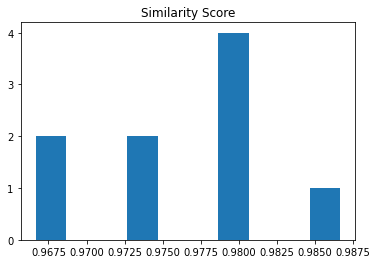

In [15]:
# example of one case of similarity testing for the ensemble

num_neighbours = 10
iso_location = read_iso_loc_data()

all_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
               'cosine', 'euclidean', 'manhattan', 'minkowski']

interests = ["covid", 
             "infrastructure_quality_and_availability",
             "health_and_safety",
             "cost",
             "fun",
             "nature",
             "food",
             "museums",
             "showstheatresandmusic",
             "wellness",
             "wildlife"]

regions = ['Asia-Pacific', 'Europe and Africa', 'Americas']

# randomly selecting 3 interest combinations (only 3 to save time - more takes too long to run)

interest_combs_10NN = list(more_itertools.powerset(interests))

interest_combs_10NN_chosen = random.sample(interest_combs_10NN, 3)

while [False] * 15 in interest_combs_10NN_chosen:
    interest_combs_10NN_chosen = random.sample(interest_combs, 3)
    
# randomly choosing 5 countries

countries_10NN_chosen = random.sample(list(iso_location['location'].drop_duplicates()), 5)

# computing proportion of similarity for each metric, across different country and interest combinations

prop_similarity = {}

for metric in all_metrics:
    dist_metrics = list(set(all_metrics) - set([metric]))
    regions = ['Asia-Pacific', 'Europe and Africa', 'Americas']
    
    for interests in interest_combs_10NN_chosen:  
    
        if len(interests) > 0 and len(regions) > 0:
            continents = convert_regions_to_continents(regions)

            cols_of_interest = convert_interests_to_cols(interests)
            weightings = generate_feature_weightings_dict(cols_of_interest)

            for country in countries_10NN_chosen:  
                medians_scaled, medians, data_no_quant = prepare_data_for_nn(countries_data, country, continents, weightings)

                if not loc_to_iso_code(country, iso_location) in medians.index:
                    continue

                # computing neighbour set using all metrics
                neighbours_all_metrics = list(generate_final_df_w_nn(country,
                                                                 medians_scaled,
                                                                 medians,
                                                                 data_no_quant,
                                                                 num_neighbours = num_neighbours,
                                                                 dist_metrics=all_metrics)['10NN'])[0]

                # computing neighbour set using all metrics except "metric"
                neighbours_metric_missing = list(generate_final_df_w_nn(country,
                                                                 medians_scaled,
                                                                 medians,
                                                                 data_no_quant,
                                                                 num_neighbours = num_neighbours,
                                                                 dist_metrics=dist_metrics)['10NN'])[0]

                # computing intersection of the two neighbour sets
                neighbours_intersect = set(neighbours_all_metrics).intersection(neighbours_metric_missing)    

                
                # computing proportion of neighbours shared between both sets
                sim = len(neighbours_intersect)/num_neighbours

                if not metric in prop_similarity:
                    prop_similarity[metric] = [sim]
                else:
                    prop_similarity[metric].append(sim)
                    
# computing average proportion of similarity, per metric

avg_prop_similarity = {}

for metric in prop_similarity.keys():
    avg_prop_similarity[metric] = mean(prop_similarity[metric])
    
sim_vals = list(avg_prop_similarity.values())

# plotting similarity scores across interest and country combinations

fig1, ax1 = plt.subplots()
ax1.set_title('Similarity Score')
ax1.hist(sim_vals)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

_Figure 2: A distribution of all collected similarity scores._

Tested across all randomly selected inputs, we found that all scores stayed within a range of 0.95 and 1. Therefore we found an average of 97% similarity between all models after the removal of each distant metric, allowing us to conclude that the model is quite stable and doesn't depend on any one metric.

#### 4.1.2. Evaluating Clustering

For the size-constrained clustering, we decided to utilise a silhouette score to determine the model’s goodness of fit. Similarly to KNN, we had to randomly select a sample of 100 combination of user interests, combined with all possible combination of region inputs. We then clustered on each of the resulting combinations and collected all silhouette scores.

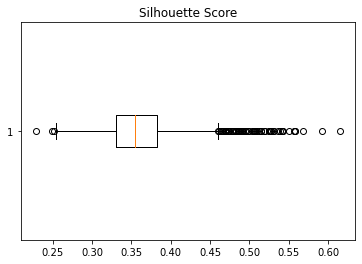

In [16]:
scores = []

# randomly choosing 100 interest combinations
# each interest combination is essentially a list of 15 Booleans, 1 per interest
# each list of Booleans is used to create an interested dict two code blocks down

interest_combs = list(itertools.product([False, True], repeat=15))

interest_combs_chosen = random.sample(interest_combs, 100)

while [False] * 15 in interest_combs_chosen:
    interest_combs_chosen = random.sample(interest_combs, 100)
    
# generating all region combinations

region_combs = list(more_itertools.powerset(regions))

interests = ["covid", 
             "infrastructure_quality_and_availability",
             "health_and_safety",
             "cost",
             "fun",
             "nature",
             "food",
             "museums",
             "showstheatresandmusic",
             "wellness",
             "wildlife"]

for interest_comb in interest_combs_chosen:  
    for regions in region_combs:
        # generating the interested dict corresponding to the given interest combination, interest_comb
        interested = {}
        for i, interest in enumerate(interests):
            interested[interest] = interest_comb[i]
            
        # computing silhouette score, for given sets of interests and regions
        if list(interested.values()).count(True) != 0 and len(regions) != 0:
            weightings = convert_interests_to_col_weightings(interested)
            medians_scaled_pca, medians_scaled = prepare_data_for_clustering(countries_data, regions, weightings)

            scores.append(compute_silhouette_score(medians_scaled_pca))
            
# plotting silhouette scores across interest and region combinations

fig2, ax2 = plt.subplots()
ax2.set_title('Silhouette Score')
ax2.boxplot(scores, vert=False)
plt.show()

_Figure 3: A distribution of all collected silhouette scores for the sample._

From the boxplot above we can see that the average silhouette score for the clusters were around 0.36, with the range from 0.25 to 0.6. As no results fell close to or below zero, this would suggests that the clusters are different from one another. However as it is very much below 1, our clusters are still not as clearly distinguished or significantly different from one another. 

#### 4.1.3. Qualitative Evaluation

As a qualitative measure, we also compared our result to travel recommendations made by travel writers and websites. This was to compare our subjective recommendation with popular opinion and suggestions from travel professionals. 

We compared the countries listed on our recommender with other countries listed on blogs or recommendation websites with similar interests (e.g. travelling in Europe or best countries for museums). Through this we found that our recommendation were often similar to what others were suggesting. While there wasn't 100% similarity, there generally weren't any abnormal suggestions from our algorithm. 

Although it is worth noting that this evaluation method was purely a sense check. There were many limitations to this as it was difficult to find online recommendations which matched our specific user interests. Therefore it was simply used to double check if we had any outliers in certain suggestions.

### 4.2. Deployment Process ####
Our deployment process consisted of several steps: planning, development, testing, and deployment of the final product. These steps are closely based on the PMKBOK Process Groups, widely used in project management domains.

#### 4.2.1. Planning ####
Our planning phase was multifaceted. 

First, we had to identify and acquire data from multiple sources. This included static sources such as reports, and dynamic constantly updating sources such as APIs and RSS feeds.

Then, we formulated the ensemble KNN and k-means size-constrained clustering algorithms. This was done through a combination of our own research and in consultation with the DATA3888 tutoring team. 

We then prototyped the dashboard design using wireframes and wireflows on paper and subsequently on the Figma web application. Prototyping in this way is a key process in the User Interface and User Experience disciplines. 

#### 4.2.2. Development #### 
Our team then split into two discrete teams: an analytics team, and a UI group. We made use of GitHub in order to facillitate code sharing and collaboration. Both teams used a singular repository with multiple branches. 

The analytics code utilised the scikit-learn, numpy, pandas and k-means-constrained libraries, while the UI component was implemented using the Plotly Dash Python libraries and the Dash Extensions Python library. The UI elements were implemented using the Bulma CSS framework. The dashboard and code are served by a Flask server.

The analytics code and basic UI implementation were completed in parallel, with the teams working together in the last stage to implement application callbacks in order to utilise the analytics functionality within the dashboard.


#### 4.2.3. Testing ####
Testing was performed during all stages of development in an ad-hoc manner. Using a range of inputs into the dashboard, including normal input and edges cases, (nothing selected, everything selected, etc.) subsequent outputs were checked for consistent results and callback errors (provided via the Plotly Dash debug mode).

#### 4.2.4. Deployment and Showcase of the Final Product #### 
After integration and final testing, the server was put into production mode. A feature of the application is that on initial startup, it fetches the most up-to-date information from our data sources. The application is run using `main.py`.

A user will be first be greeted with a variety of options allowing them to select a destnation on interest, possible concerns, and travel interests. The subsequent results are based on the interests and concerns that the user selects. The travel recommendation system then provides ten to twelve destination recommendations, with their geographical locations highlighted on a map of the world.

<img src="fig/Figure 4.png" alt="User selected destinations and factors">

*Figure 4: User selected destination, concerns, and interests and resulting destination suggestions and portraits, with destinations highlighted on the world map.*

After this point, a user can click on a destination's portrait to view extra information about a destination, including travel warnings, a short description, covid statistics, and scores relating to the user's selected concerns and interests.

<img src="fig/Figure 5.png" alt="Extra travel information for Turkey">

*Figure 5: Destination information for Turkey, with travel warnings, a short description, and factor scores.*

## 5. Discussion/Conclusion

One shortcoming of the project's current implementation is the lack of any forecasted covid data. As the dashboard is intended in the use of planning travel, use of current covid statistics may not be reflective of the situation at the intended time of travel. Implementation of forecasting, alongside a visual aid reflecting the confidence of the forecasts into the future would be a useful addition to the project.

Issues with data quality, particularly in the OWID covid dataset, resulted in a significant portion of countries being excluded from the dashboard's potential recommended countries. However, since issues with missing values stem from the country in question's reporting, there is little which is possible to remedy this issue. 

The dashboard currently outputs recommendations on a country level, which matches the granularity of most of the datasets we received. However, some datasets (i.e. Triposo) provide city level data, which may be more useful to our intended audience when planning trips, especially when recommended countries are large or have many cities which vary in character. Implementation of city level recommendations would be a welcome addition in future work, both within a country and across multiple countries.

Given that the dashboard currently provides 10 recommended countries in its output, use of the tool in planning holidays spanning multiple destinations is expected. However, additional work could be added in aiding the planning of multi-stop trips. Implementing flight price, geographical and accomodation data for calculation and recommendation of potential multi-stop trips, as well as adding expected price ranges for single and multi-stop trips would be a useful addition.

On the clustering side of the analytics, where users do not specify a starting country in which they are interested, more advanced analytical algorithms could have been implemented, i.e. DBSCAN. The implementations of such algorithms may have aided performance, but it is noted that with a silhouette score of 0.3 on our size constrained clustering, our clusters still had good separation.

## 6. Student contributions

### 6.1. Eve Fernando

I found and integrated various data sources, including all data obtained from the Triposo API and Smartraveller RSS feed. I also integrated live COVID data from the OWID GitHub repository. I performed data pre-processing, including scaling and PCA. I also implemented feature weighting for the features the user was interested in. In terms of our modelling approach, I found the nearest neighbours and _size-constrained_ k-means clustering algorithms through online research, and subsequently implemented them. I also implemented the logic used to find the "best" cluster produced by size-constrained k-means clustering. In terms of evaluation, though Serena Watson completed most of the work in this regard, I also contributed some code to this. In particular, I implemented random selection of interest/country combinations for evaluation of 10-NN/clustering. Additionally, I successfully fixed a UI bug, which involved recommended countries on the right side of the UI changing when an individual country was clicked (desired behaviour was for _no change_ to occur). Furthermore, I worked with Serena Watson to write the presentation script and create the slides. I wrote up sections 3.2 and 3.3 in the report, and generated Figures 2 and 3.

### 6.2. Marie Montgomery
I contributed to the idea formulation including data collection. I implemented the initial Googles Places API usage, before refinement by Yan. I worked mostly on the UI section of the project, implementing a significant part of the UI including base structure and layout, use of CSS, dropdown menus, a variety of callback functions to interact with the ML/analytics code, session storage, as well as implementation of the functionality of the left info panel for a selected destination. For the report, I contributed section 4.2.

### 6.3. Rayani Saha

### 6.4. Serena Watson

In terms of contribution, I was involved in the initial idea formulation and data collection phases before branching out to exploring initial analytics options and refine later analytics models used for our recommendation. I was also heavily involved in researching, identifying, and applying strategies to evaluate our product as well as the presentation production and delivery. For the report, I contributed to all evaluation sections, with a focus on 4.1.


### 6.5. Stuart Toft

### 6.6. Yan Liu
I contributed to the idea formulation and I was invovled in the data/information collection. I joined in the earlier stage of analytics work, which is experimenting on different clustering methods, tried the normal k-means cluster with a brief evaluation as a back up. For the dashboard, I firstly made the storyboard for the product, then implemented showing the correspoding photos when the recommendations are returned. I presented the product demonstration with Ray. For the report, I worte up the question formulation which is section 3.1. 

## 7. References

Australian Government. (2022, April 18). International Travel. Official Australian Government Information. https://www.australia.gov.au/international-travel

Bradley, P. S., Bennett, K. P., & Demiriz, A. (2000). Constrained k-means clustering. Microsoft Research, Redmond, 20(0), 0.

Destinations. Smartraveller. (2022). Retrieved 30 May 2022, from https://www.smartraveller.gov.au/destinations.

Europe's Best Destinations. (2022). Best Countries to Visit in Europe in 2022. Retrieved 31 May 2022, from https://www.europeanbestdestinations.com/best-of-europe/best-countries-to-visit-in-europe/.

Google Places API. Google Developers. (2022). Retrieved 30 May 2022, from https://developers.google.com/maps/documentation/places/web-service.

Laubheimer, P. (2016, December 4). Wireflows: A UX Deliverable for Workflows and Apps. Nielsen Norman Group. https://www.nngroup.com/articles/wireflows/

Levy-Kramer, J. (2022). k-means-constrained.

Lonely Planet. (2022). Travel Guides & Travel Information  Retrieved 31 May 2022, from https://www.lonelyplanet.com/.

Our World in Data, Coronavirus Disease (COVID-19) – the data [Dataset]. https://ourworldindata.org/coronavirus-data

Planetware. (2022). 19 Best Countries to Visit in Europe. Retrieved 31 May 2022, from https://www.planetware.com/europe/best-countries-to-visit-in-europe-d-1-19.htm.

Reuters. (2011). Travel Picks: Top 10 museum destinations. Retrieved 30 May 2022, from https://www.reuters.com/article/uk-travel-picks-museums-idUSLNE76S01020110729

Touropia. (2022). 15 Best Countries to Visit in Asia. Retrieved 31 May 2022, from https://www.touropia.com/best-countries-to-visit-in-asia/.

Triposo API. triposo. (2022). Retrieved 30 May 2022, from https://www.triposo.com/api/.

Vargas, R. V. (2001). A new approach to PMBOK guide 2000. Paper presented at Project Management Institute Annual Seminars & Symposium, Nashville, TN. Newtown Square, PA: Project Management Institute.

World Bank (2019). WEF Travel & Tourism Competitiveness [Dataset]. https://tcdata360-backend.worldbank.org/api/v1/datasets/78/dump.csv

## 8. Appendix

### 8.1. Code used to generate Figure 2


```python
# example of one case of similarity testing for the ensemble

num_neighbours = 10
iso_location = read_iso_loc_data()

all_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
               'cosine', 'euclidean', 'manhattan', 'minkowski']

interests = ["covid", 
             "infrastructure_quality_and_availability",
             "health_and_safety",
             "cost",
             "fun",
             "nature",
             "food",
             "museums",
             "showstheatresandmusic",
             "wellness",
             "wildlife"]

regions = ['Asia-Pacific', 'Europe and Africa', 'Americas']

# randomly selecting 3 interest combinations (only 3 to save time - more takes too long to run)

interest_combs_10NN = list(more_itertools.powerset(interests))

interest_combs_10NN_chosen = random.sample(interest_combs_10NN, 3)

while [False] * 15 in interest_combs_10NN_chosen:
    interest_combs_10NN_chosen = random.sample(interest_combs, 3)
    
# randomly choosing 5 countries

countries_10NN_chosen = random.sample(list(iso_location['location'].drop_duplicates()), 5)

# computing proportion of similarity for each metric, across different country and interest combinations

prop_similarity = {}

for metric in all_metrics:
    dist_metrics = list(set(all_metrics) - set([metric]))
    regions = ['Asia-Pacific', 'Europe and Africa', 'Americas']
    
    for interests in interest_combs_10NN_chosen:  
    
        if len(interests) > 0 and len(regions) > 0:
            continents = convert_regions_to_continents(regions)

            cols_of_interest = convert_interests_to_cols(interests)
            weightings = generate_feature_weightings_dict(cols_of_interest)

            for country in countries_10NN_chosen:  
                medians_scaled, medians, data_no_quant = prepare_data_for_nn(countries_data, country, continents, weightings)

                if not loc_to_iso_code(country, iso_location) in medians.index:
                    continue

                # computing neighbour set using all metrics
                neighbours_all_metrics = list(generate_final_df_w_nn(country,
                                                                 medians_scaled,
                                                                 medians,
                                                                 data_no_quant,
                                                                 num_neighbours = num_neighbours,
                                                                 dist_metrics=all_metrics)['10NN'])[0]

                # computing neighbour set using all metrics except "metric"
                neighbours_metric_missing = list(generate_final_df_w_nn(country,
                                                                 medians_scaled,
                                                                 medians,
                                                                 data_no_quant,
                                                                 num_neighbours = num_neighbours,
                                                                 dist_metrics=dist_metrics)['10NN'])[0]

                # computing intersection of the two neighbour sets
                neighbours_intersect = set(neighbours_all_metrics).intersection(neighbours_metric_missing)    

                
                # computing proportion of neighbours shared between both sets
                sim = len(neighbours_intersect)/num_neighbours

                if not metric in prop_similarity:
                    prop_similarity[metric] = [sim]
                else:
                    prop_similarity[metric].append(sim)
                    
# computing average proportion of similarity, per metric

avg_prop_similarity = {}

for metric in prop_similarity.keys():
    avg_prop_similarity[metric] = mean(prop_similarity[metric])
    
sim_vals = list(avg_prop_similarity.values())

# plotting similarity scores across interest and country combinations

fig1, ax1 = plt.subplots()
ax1.set_title('Similarity Score')
ax1.hist(sim_vals)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
```

### 8.2. Code used to generate Figure 3

```python
scores = []

# randomly choosing 100 interest combinations
# each interest combination is essentially a list of 15 Booleans, 1 per interest
# each list of Booleans is used to create an interested dict two code blocks down

interest_combs = list(itertools.product([False, True], repeat=15))

interest_combs_chosen = random.sample(interest_combs, 100)

while [False] * 15 in interest_combs_chosen:
    interest_combs_chosen = random.sample(interest_combs, 100)
    
# generating all region combinations

region_combs = list(more_itertools.powerset(regions))

interests = ["covid", 
             "infrastructure_quality_and_availability",
             "health_and_safety",
             "cost",
             "fun",
             "nature",
             "food",
             "museums",
             "showstheatresandmusic",
             "wellness",
             "wildlife"]

for interest_comb in interest_combs_chosen:  
    for regions in region_combs:
        # generating the interested dict corresponding to the given interest combination, interest_comb
        interested = {}
        for i, interest in enumerate(interests):
            interested[interest] = interest_comb[i]
            
        # computing silhouette score, for given sets of interests and regions
        if list(interested.values()).count(True) != 0 and len(regions) != 0:
            weightings = convert_interests_to_col_weightings(interested)
            medians_scaled_pca, medians_scaled = prepare_data_for_clustering(countries_data, regions, weightings)

            scores.append(compute_silhouette_score(medians_scaled_pca))
            
# plotting silhouette scores across interest and region combinations

fig2, ax2 = plt.subplots()
ax2.set_title('Silhouette Score')
ax2.boxplot(scores, vert=False)
plt.show()      
```